**Projet Data Analysis_R**

L’analyse de la personnalité des clients est une analyse détaillée des clients idéaux d’une entreprise. Elle aide une entreprise à mieux comprendre ses clients et lui permet de modifier plus facilement ses produits en fonction des besoins, comportements et préoccupations spécifiques des différents types de clients.

L’analyse de la personnalité des clients aide une entreprise à adapter son produit en fonction de ses clients cibles provenant de différents segments de clientèle. Par exemple, au lieu de dépenser de l’argent pour commercialiser un nouveau produit auprès de tous les clients de la base de données de l’entreprise, une entreprise peut analyser quel segment de clientèle est le plus susceptible d’acheter le produit et ensuite commercialiser le produit uniquement auprès de ce segment particulier.

données :
*People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

*Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

*Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

*Place

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month

Questions :

Qualité du jeu de données proposé? Un pre-processing des données est-il nécessaire? Comment se comportent les différentes variables entre elles? Les achats dépendent-ils du style de vie de l'acheteur (famille, marié, revenu etc)? Les promotions proposées sont elles efficaces ? Sur quels types de clients ? Sur quels types de produits ? Quels endroits de ventes sont le plus utilisés ? Sur quels types de clients ? Sur quels types de produits ? Des profils de clients se dessinent-ils ? Si oui, quels types de clients, quels types d'achats, grace à quels endroits de ventes ?

Installation des packages utilisés : 

In [1]:
library(ggplot2)
library(graphics)
library(corrplot)
library(FactoMineR)
library(factoextra)

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
data <- read.csv("marketing_campaign.csv", header=TRUE, sep="\t")
head(data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


In [3]:
summary(data)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
                                                                     
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :66666

Transformation des données:

In [4]:
data<-data[,-27] #on enleve Zcontact et Zrevenue pcq ce sont des constantes
data<-data[,-27]
summary(data)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
                                                                     
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :66666

In [5]:
colnames(data)[apply(data, 2, anyNA)]
#on voit que dans la colonne Income, il y a des valeurs manquantes (24 comme on peut le voir dans le summary)

[1] "Income"

In [6]:
data$Income <-ifelse(is.na(data$Income), median(data$Income, na.rm = TRUE), data$Income)
#on remplace les valeurs manquantes par la médiane des valeurs de Income
#on utilise la médiane au lieu de la moyenne pour que les outliers (ici 6666) n'influence la valeur que l'on va prendre 

In [7]:
summary(data)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35539   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52238   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68290   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :666666   Max.   :2.0000   Max.   :2.0000                     
    Recency  

In [8]:
#on met en facteur les variables qualitatives pour pouvoir travailler dessus
data[, "Education"] <- as.factor(data[, "Education"])
data[, "Marital_Status"] <- as.factor(data[, "Marital_Status"])
data[, "Kidhome"] <- as.factor(data[, "Kidhome"])
data[, "Teenhome"] <- as.factor(data[, "Teenhome"])
data[, "AcceptedCmp3"] <- as.factor(data[, "AcceptedCmp3"])
data[, "AcceptedCmp4"] <- as.factor(data[, "AcceptedCmp4"])
data[, "AcceptedCmp5"] <- as.factor(data[, "AcceptedCmp5"])
data[, "AcceptedCmp1"] <- as.factor(data[, "AcceptedCmp1"])
data[, "AcceptedCmp2"] <- as.factor(data[, "AcceptedCmp2"])
data[, "Complain"] <- as.factor(data[, "Complain"])
data[, "Response"] <- as.factor(data[, "Response"])

In [26]:
#on transforme la variable Dt_Customer en Date
data[,"Dt_Customer"] <- as.Date(data$Dt_Customer, format = "%d-%m-%y")
summary(data)

       ID          Year_Birth        Education     Marital_Status
 Min.   :    0   Min.   :1893   2n Cycle  : 203   Married :864   
 1st Qu.: 2828   1st Qu.:1959   Basic     :  54   Together:580   
 Median : 5458   Median :1970   Graduation:1127   Single  :480   
 Mean   : 5592   Mean   :1969   Master    : 370   Divorced:232   
 3rd Qu.: 8428   3rd Qu.:1977   PhD       : 486   Widow   : 77   
 Max.   :11191   Max.   :1996                     Alone   :  3   
                                                  (Other) :  4   
     Income       Kidhome  Teenhome  Dt_Customer          Recency     
 Min.   :  1730   0:1293   0:1158   Min.   :1-01-20    Min.   : 0.00  
 1st Qu.: 35539   1: 899   1:1030   1st Qu.:8-07-12    1st Qu.:24.00  
 Median : 51382   2:  48   2:  52   Median :16-02-20   Median :49.00  
 Mean   : 52238                     Mean   :16-02-23   Mean   :49.11  
 3rd Qu.: 68290                     3rd Qu.:23-05-20   3rd Qu.:74.00  
 Max.   :666666                     Max.   :31

Analyse des outliers :

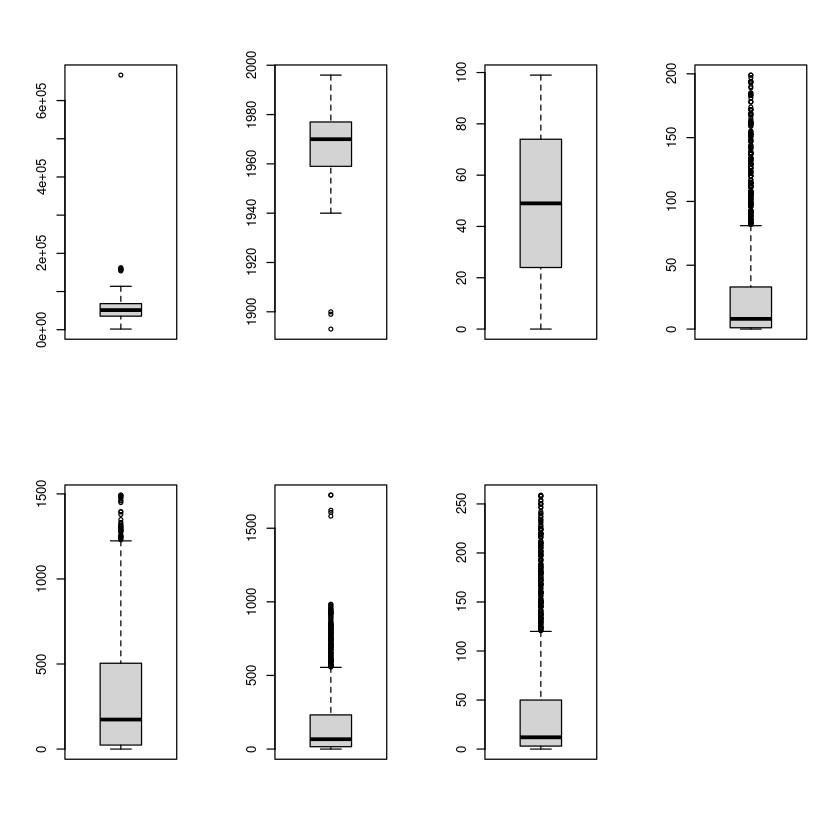

In [19]:
par(mfrow = c(2, 4))  
boxplot(data$Income)
boxplot(data$Year_Birth)
boxplot(data$Recency)
boxplot(data$MntFruits)
boxplot(data$MntWines)
boxplot(data$MntMeatProducts)
boxplot(data$MntFishProducts)

on fait les boxplots de chaque variables pour observer si il y a des valeurs abérrantes.
- ici on ne regarde pas la variable Dt_Customer que l'on transformera plus tard en numeric
- on remarque plusieurs outliers au niveau de plusieurs variables que l'on va devoir enlever :

Income : on voit un outlier 

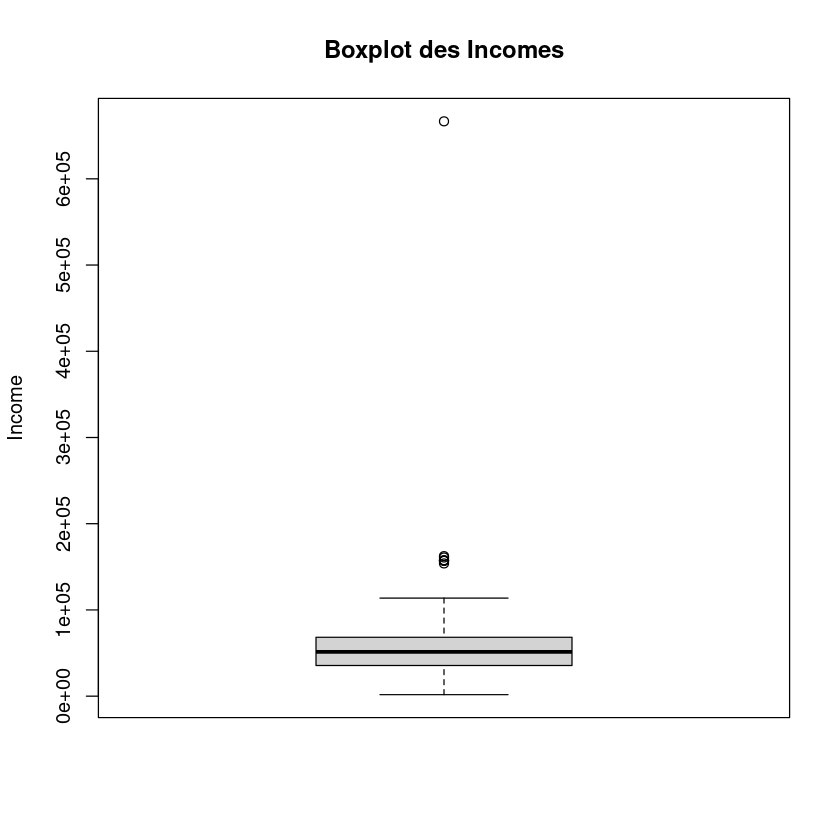

In [20]:
boxplot(data$Income, main = "Boxplot des Incomes", ylab = "Income")

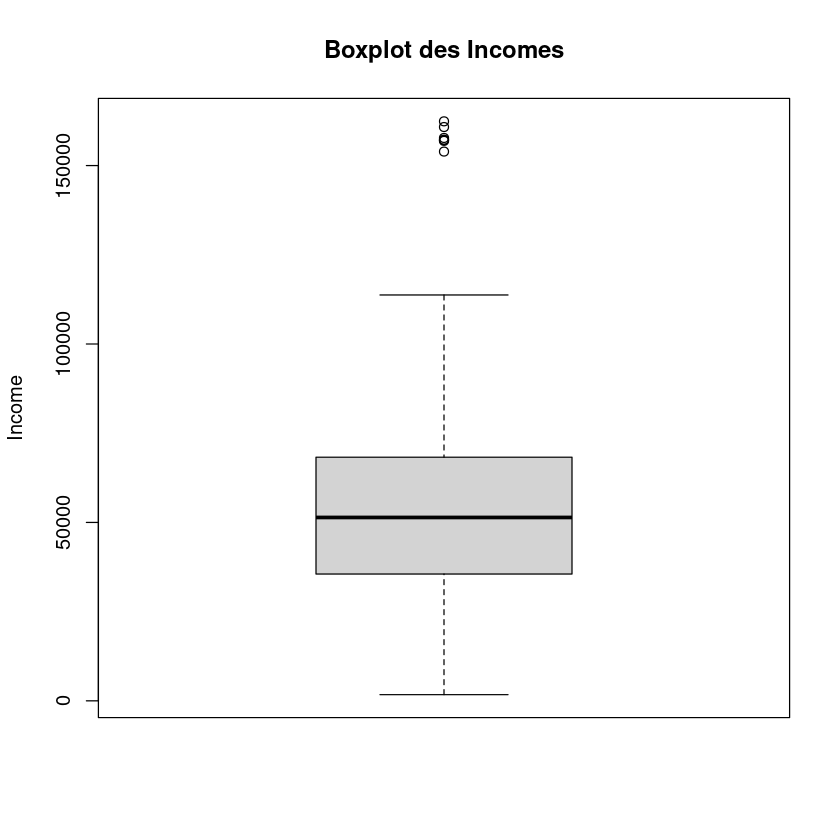

In [21]:
data_clean <- data[data$Income <= 500000, ]
#verification : 
boxplot(data_clean$Income, main = "Boxplot des Incomes", ylab = "Income")

Year_Birth : plusieurs outliers (les personnes ne sont surement plus de ce monde)

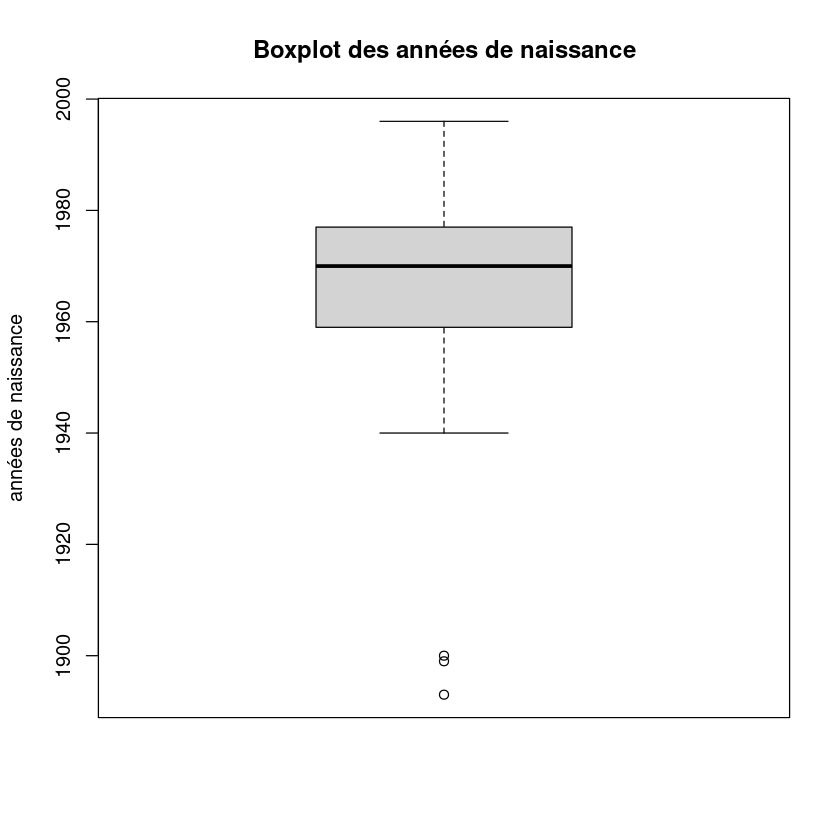

In [22]:
boxplot(data_clean$Year_Birth, main = "Boxplot des années de naissance", ylab = "années de naissance")

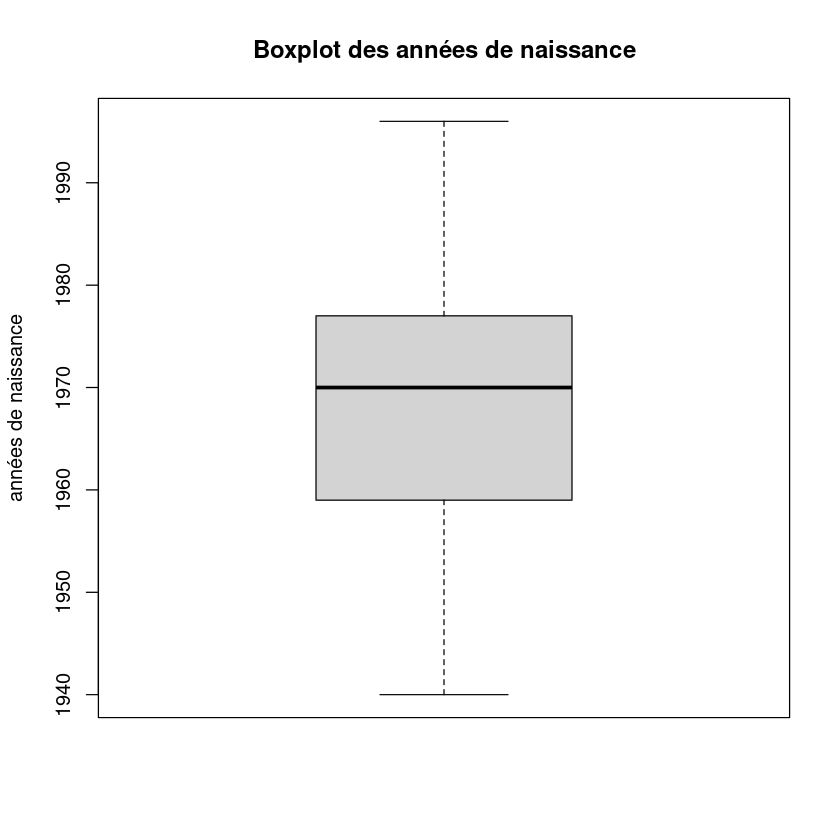

In [23]:
data_clean <- data_clean[data_clean$Year_Birth > 1920, ]
#verification :
boxplot(data_clean$Year_Birth, main = "Boxplot des années de naissance", ylab = "années de naissance")

MntMeatProducts : plusieurs outliers (ce ne sont pas forcément des données fausses mais l'objectif est de cibler des clients types, non des clients niches)

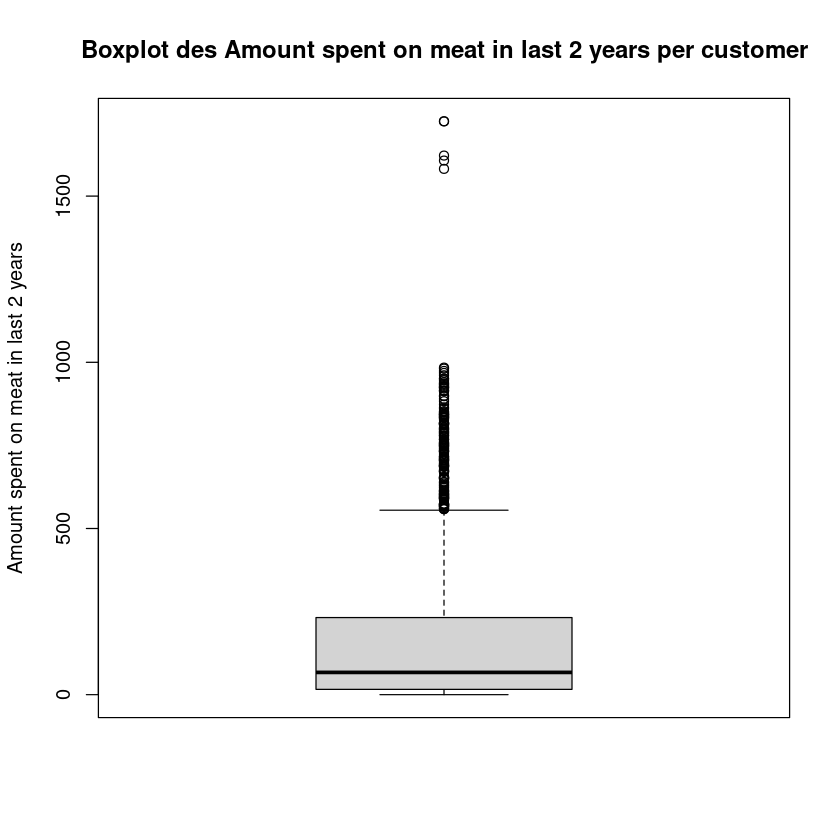

In [24]:
boxplot(data_clean$MntMeatProducts, main = "Boxplot des Amount spent on meat in last 2 years per customer", ylab = "Amount spent on meat in last 2 years")

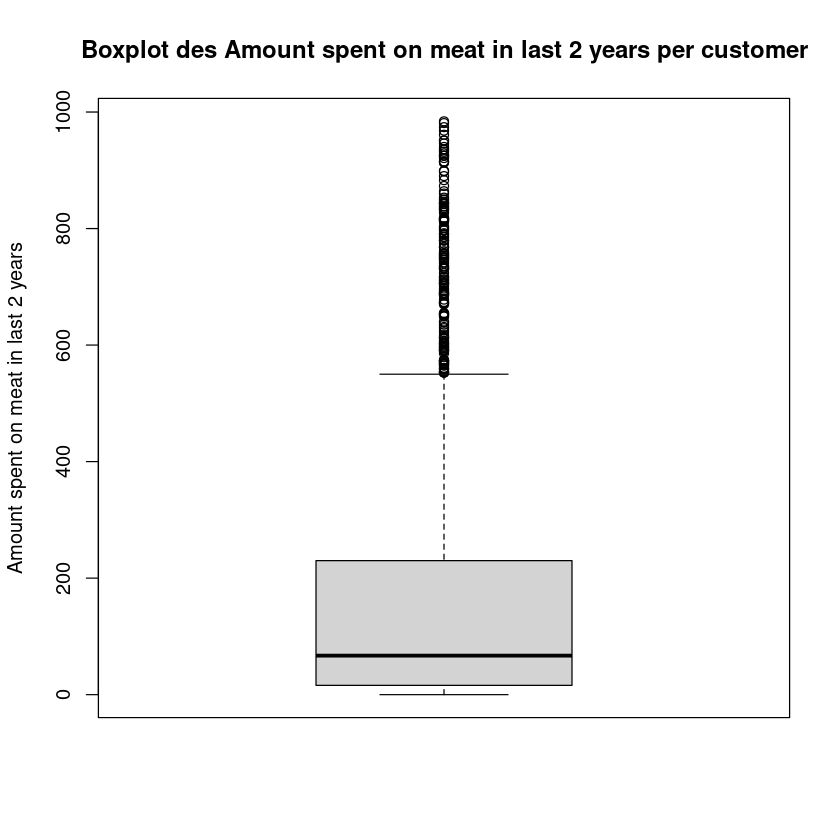

In [25]:
data_clean <- data_clean[data_clean$MntMeatProducts < 1500, ]
#verification :
boxplot(data_clean$MntMeatProducts, main = "Boxplot des Amount spent on meat in last 2 years per customer", ylab = "Amount spent on meat in last 2 years")

Nous venons d'enlever tout les outliers. 
#prochaine étape, catégorie d'age

In [ ]:
corrplot(cor(data[, c(2, 5,9:19)]),method="ellipse")
#on fait la matrice de corrélation